# Making a Question Applicable to the Statement Provided

In [1]:
import spacy
from spacy import displacy
nlp = spacy.load("en_core_web_sm")

In [2]:
sentence_text = "Alex loves gymnastics."
question_text = "Does Alex love gymnastics?"
sentence_doc = nlp(sentence_text)
question_doc = nlp(question_text)

In [3]:
displacy.render(sentence_doc, style='dep')
displacy.render(question_doc, style='dep')

# To make the derived circuits equal, use the 'drop_stop' and 'use_lemmas' options
- This turns 'loves' into 'love', 'gymnastics' into 'gymnastic' and removes 'does'. We should keep in mind potential caveats, although spacy does keep morphological information separately, so we could still extract number, conjugation, etc. of words

Assertion, after using spaCy interface:


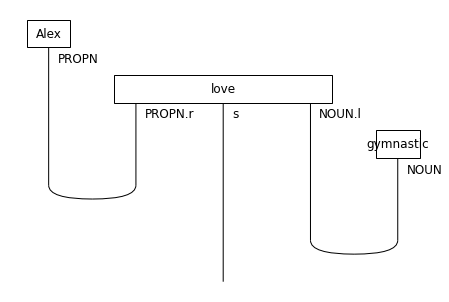

Question, after using spaCy interface:


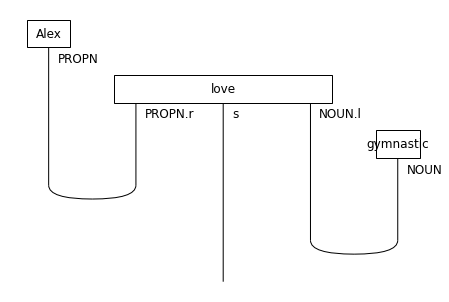

In [4]:
# import sys
# sys.path.append('../..')
from discopy.grammar.spacyinterface import document_to_diagrams
sentence_diagram, sentence_types = document_to_diagrams(sentence_doc, drop_stop=True, use_lemmas=True)
question_diagram, question_types = document_to_diagrams(question_doc, drop_stop=True, use_lemmas=True)

all_types = sentence_types.union(question_types)

sentence_diagram = sentence_diagram[0]
question_diagram = question_diagram[0]

print("Assertion, after using spaCy interface:")
sentence_diagram.draw()
print("Question, after using spaCy interface:")
question_diagram.draw()

assert sentence_diagram == question_diagram

In [5]:
from collections import OrderedDict
all_words = list(OrderedDict.fromkeys(sentence_diagram.boxes[:3] + question_diagram.boxes[:3]))
all_words

[Word('Alex', Ty('PROPN')),
 Word('love', Ty(Ob('PROPN', z=1), 's', Ob('NOUN', z=-1))),
 Word('gymnastic', Ty('NOUN'))]

Circuit for 'Alex loves gymnastics', after SpaCy preprocessing:


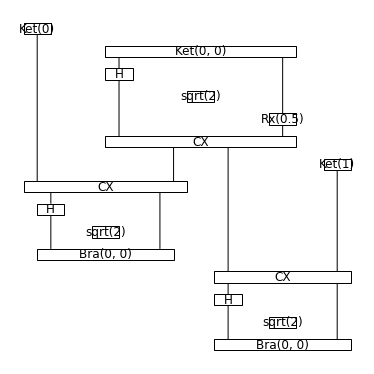

Circuit for 'Does Alex love gymnastics?', after SpaCy preprocessing:


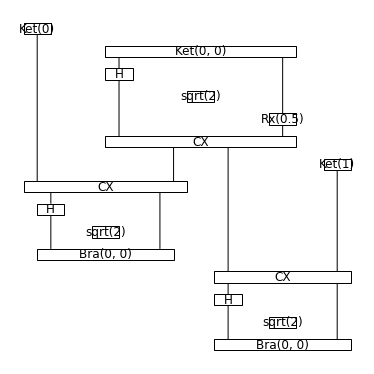

In [6]:
from discopy import Ty, CircuitFunctor, qubit
from discopy.quantum import Ket, H, Rx, CX, sqrt
from functools import partial

def verb_ansatz(phase):
    return Ket(0, 0) >> H @ sqrt(2) @ Rx(phase) >> CX

ob = {ty: 0 if ty == Ty('s') else 1 for ty in all_types}
ar = lambda params: {
        all_words[0]: Ket(0),    # Alex
        all_words[1]: verb_ansatz(params['loves']), # love
        all_words[2]: Ket(1)     # gymnastic
}

F = lambda params: CircuitFunctor(ob, ar(params))

params0 = {'loves': 0.5}

print("Circuit for 'Alex loves gymnastics', after SpaCy preprocessing:")
sentence_circ = F(params0)(sentence_diagram)
sentence_circ.draw(aspect='auto', draw_types=False, figsize=(5, 5))

print("Circuit for 'Does Alex love gymnastics?', after SpaCy preprocessing:")
question_circ = F(params0)(question_diagram)
question_circ.draw(aspect='auto', draw_types=False, figsize=(5, 5))

# The circuits for the statement and the question are equal:

In [7]:
assert question_circ == sentence_circ

# More ideas:

- Generate word vectors using an algorithm like word2vec to assign unique kets/ansätze to different words

In [8]:
for token in sentence_doc: print(f"{token}:\n{token.vector}\n{token.vector.shape}\n")

Alex:
[-0.49066538 -0.8116858   1.9506084  ... -0.14664465 -0.7413063
 -1.6277856 ]
(96,)

loves:
[ 0.32313567  2.9477382   1.1815286  ... -1.8904581  -0.7655498
  0.16331095]
(96,)

gymnastics:
[ 5.364125   4.6513186  1.6547782 ... -3.099183   1.4550397  2.9307575]
(96,)

.:
[ 0.46008432 -3.206684   -2.0769093  ...  6.5204277  -1.1777118
 -0.1681141 ]
(96,)

